In [1]:
import csv
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [3]:
df.head(5)

,OBJECTID,GEOID10,NAME10,PLNG_REGION,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,...,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,GlobalID
0,1,13045910103,9101.03,ARC 20,0,0,0,0,0,1,...,0.830444,832.244207,0.165786,1212.092423,0.812939,388.429151,0.868969,30.598599,0.017656,{5550A054-FDCE-4733-8B0C-A1947228CE5D}
1,2,13045910104,9101.04,ARC 20,0,0,0,0,1,0,...,0.908498,2714.580415,0.292740,2531.804935,0.935281,613.913957,0.769316,105.395259,0.033133,{C6FF347E-7A0E-49CC-95F8-6442CAB49326}
2,3,13045910502,9105.02,ARC 20,1,1,1,1,1,0,...,0.677910,1634.143695,0.559638,394.285953,0.595598,108.874610,0.513559,141.638535,0.141497,{59E4487C-A509-45FF-95E5-D3C0BBE650BB}
3,4,13045910800,9108.00,ARC 20,0,0,0,0,0,1,...,1.000000,1557.335152,0.391881,958.000006,1.000000,491.000002,1.000000,41.470898,0.028405,{B14B7E5F-B673-439E-9C6E-638AD0B38A33}
4,5,13045910101,9101.01,ARC 20,1,1,1,1,1,0,...,0.247035,738.495538,0.124557,400.600253,0.237182,153.517815,0.282722,61.471188,0.027176,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806}


In [4]:
print(df.columns)

Index(['OBJECTID', 'GEOID10', 'NAME10', 'PLNG_REGION', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'Urban', 'Rural', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'HUNVFlag',
       'GroupQuartersFlag', 'OHU2010', 'NUMGQTRS', 'PCTGQTRS',
       'LowIncomeTracts', 'POP2010', 'UATYP10', 'lapophalf', 'lapophalfshare',
       'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare',
       'laseniorshalf', 'laseniorshalfshare', 'lahunvhalf', 'lahunvhalfshare',
       'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1',
       'lakids1share', 'laseniors1', 'laseniors1share', 'lahunv1',
       'lahunv1share', 'GlobalID'],
      dtype='object')


In [5]:
# Create three DF's to store different columns
kids_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","lakidshalf","lakidshalfshare","lakids1","lakids1share","GlobalID","lalowi1","lalowi1share","lapop1","lapop1share"}]
kids_df


,PLNG_REGION,lakidshalf,lakids1share,lalowi1,Urban,lapop1,lakidshalfshare,GEOID10,lakids1,GlobalID,lapop1share,lalowi1share,NAME10
0,ARC 20,1330.181374,0.812939,832.244207,0,4168.828564,0.892140,13045910103,1212.092423,{5550A054-FDCE-4733-8B0C-A1947228CE5D},0.830444,0.165786,9101.03
1,ARC 20,2623.877557,0.935281,2714.580415,1,8424.506346,0.969294,13045910104,2531.804935,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},0.908498,0.292740,9101.04
2,ARC 20,657.226749,0.595598,1634.143695,1,1979.496369,0.992790,13045910502,394.285953,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},0.677910,0.559638,9105.02
3,ARC 20,958.000006,1.000000,1557.335152,0,3974.000026,1.000000,13045910800,958.000006,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},1.000000,0.391881,9108.00
4,ARC 20,1256.990076,0.237182,738.495538,1,1464.668253,0.744221,13045910101,400.600253,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},0.247035,0.124557,9101.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,ARC 20,3428.134246,0.684471,1293.902235,1,7620.260307,0.931305,13223120102,2519.536417,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},0.676094,0.114799,1201.02
944,ARC 20,2550.102779,0.762668,1193.293010,0,6703.747686,0.917964,13223120103,2118.691044,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},0.782508,0.139289,1201.03
945,ARC 20,2917.327602,0.440785,2065.519935,1,5505.013546,0.886995,13223120302,1449.743154,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},0.462762,0.173631,1203.02
946,ARC 20,1910.915240,0.737735,1633.867000,1,5005.805781,0.928530,13223120202,1518.259609,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},0.699428,0.228289,1202.02


In [6]:
# Low income vs non low income

low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1"}]
low_income_df

,PLNG_REGION,lalowi1,Urban,lapop1,lalowihalfshare,GEOID10,lalowihalf,LowIncomeTracts,GlobalID,lalowi1share,NAME10
0,ARC 20,832.244207,0,4168.828564,0.184989,13045910103,928.643255,0,{5550A054-FDCE-4733-8B0C-A1947228CE5D},0.165786,9101.03
1,ARC 20,2714.580415,1,8424.506346,0.309831,13045910104,2873.063683,0,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},0.292740,9101.04
2,ARC 20,1634.143695,1,1979.496369,0.817848,13045910502,2388.115731,1,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},0.559638,9105.02
3,ARC 20,1557.335152,0,3974.000026,0.391881,13045910800,1557.335152,1,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},0.391881,9108.00
4,ARC 20,738.495538,1,1464.668253,0.365078,13045910101,2164.547997,1,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},0.124557,9101.01
...,...,...,...,...,...,...,...,...,...,...,...
943,ARC 20,1293.902235,1,7620.260307,0.160460,13223120102,1808.542071,0,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},0.114799,1201.02
944,ARC 20,1193.293010,0,6703.747686,0.160347,13223120103,1373.688844,0,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},0.139289,1201.03
945,ARC 20,2065.519935,1,5505.013546,0.352241,13223120302,4190.258936,0,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},0.173631,1203.02
946,ARC 20,1633.867000,1,5005.805781,0.314849,13223120202,2253.373996,0,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},0.228289,1202.02


In [7]:
stores_df = df[{"NAME10","Urban","PLNG_REGION","LILATracts_1And10","LILATracts_halfAnd10","LA1and10","LAhalfand10","LA1and20","LATracts_half","LATracts1","LATracts10","LATracts20","LowIncomeTracts","POP2010","lapophalf","lapophalfshare","lalowihalf","lalowihalfshare","lapop1","lapop1share","lalowi1","lalowi1share","OHU2010", "lahunv1", "lahunv1share"}]
stores_df

,lahunv1share,lahunv1,LAhalfand10,lapop1share,NAME10,LILATracts_1And10,lalowi1,lalowi1share,LowIncomeTracts,LA1and20,...,lalowihalf,LATracts20,lapophalf,Urban,lapop1,LA1and10,OHU2010,LILATracts_halfAnd10,lalowihalfshare,LATracts_half
0,0.017656,30.598599,0,0.830444,9101.03,0,832.244207,0.165786,0,0,...,928.643255,0,4560.050754,0,4168.828564,0,1733,0,0.184989,1
1,0.033133,105.395259,1,0.908498,9101.04,0,2714.580415,0.292740,0,1,...,2873.063683,0,8923.358003,1,8424.506346,1,3181,0,0.309831,1
2,0.141497,141.638535,1,0.677910,9105.02,1,1634.143695,0.559638,1,1,...,2388.115731,0,2903.442168,1,1979.496369,1,1001,1,0.817848,1
3,0.028405,41.470898,0,1.000000,9108.00,0,1557.335152,0.391881,1,0,...,1557.335152,0,3974.000026,0,3974.000026,0,1460,0,0.391881,1
4,0.027176,61.471188,1,0.247035,9101.01,1,738.495538,0.124557,1,1,...,2164.547997,0,4519.483605,1,1464.668253,1,2262,1,0.365078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.006698,23.289431,1,0.676094,1201.02,0,1293.902235,0.114799,0,1,...,1808.542071,0,10475.236040,1,7620.260307,1,3477,0,0.160460,1
944,0.000000,0.000000,0,0.782508,1201.03,0,1193.293010,0.139289,0,0,...,1373.688844,0,7914.940175,0,6703.747686,0,2769,0,0.160347,1
945,0.021678,97.613907,1,0.462762,1203.02,0,2065.519935,0.173631,0,1,...,4190.258936,0,10591.961290,1,5505.013546,1,4503,0,0.352241,1
946,0.021585,54.220317,1,0.699428,1202.02,0,1633.867000,0.228289,0,1,...,2253.373996,0,6553.704673,1,5005.805781,1,2512,0,0.314849,1


In [8]:
#Rename columns for stores_df
stores_df = stores_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                      "GlobalID": "Global_ID",
                                      "LowIncomeTracts": "Income_Level", 
                                      "lalowihalf": "LowAcces_LowIncome05miles", 
                                      "lalowi1share": "LowAccess_LowIncome1milePRCT", 
                                      "lalowihalfshare": "LowAccess_LowIncome05milesPRCT", 
                                      "lalowi1": "LowAccess_LowIncome1mile", 
                                      "GEOID10": "Geo_ID", 
                                      "NAME10": "Name", 
                                      "lahunv1": "NoCar LowAccess1mile",
                                     "lahunv1share": "NoCar LowAccess1mile Share"})
#Checking that rename worked
stores_df["NoCar LowAccess1mile"]

0       30.598599
1      105.395259
2      141.638535
3       41.470898
4       61.471188
          ...    
943     23.289431
944      0.000000
945     97.613907
946     54.220317
947     63.348930
Name: NoCar LowAccess1mile, Length: 948, dtype: float64

In [9]:
#Filtering data to only show urban areas and creating new df
urban_stores = stores_df.loc[(stores_df["Urban"]==1) & (stores_df["Metro_Atlanta"] == "ARC 10")]
urban_stores

,NoCar LowAccess1mile Share,NoCar LowAccess1mile,LAhalfand10,lapop1share,Name,LILATracts_1And10,LowAccess_LowIncome1mile,LowAccess_LowIncome1milePRCT,Income_Level,LA1and20,...,LowAcces_LowIncome05miles,LATracts20,lapophalf,Urban,lapop1,LA1and10,OHU2010,LILATracts_halfAnd10,LowAccess_LowIncome05milesPRCT,LATracts_half
17,0.003978,8.782476,1,0.561558,1402.07,0,81.874532,0.014806,0,1,...,138.037981,0,4737.417269,1,3105.415489,1,2208,0,0.024962,1
18,0.004249,11.681039,1,0.421600,1402.08,0,528.048979,0.068462,0,1,...,1006.024462,0,6536.637064,1,3251.804581,1,2749,0,0.130432,1
19,0.011938,20.318478,1,0.417736,1403.03,0,259.816848,0.057103,0,1,...,526.739981,0,3984.209043,1,1900.698065,1,1702,0,0.115767,1
20,0.004093,9.131079,1,0.558844,1403.04,0,663.866800,0.115315,0,1,...,912.247186,0,4915.826453,1,3217.267229,1,2231,0,0.158459,1
22,0.009588,10.499310,1,1.000000,1404.08,0,411.910983,0.127172,0,1,...,411.910983,0,3238.999945,1,3238.999945,1,1095,0,0.127172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.014361,35.743917,1,0.879340,909.01,0,960.080472,0.134862,0,1,...,1124.195803,0,7076.423269,1,6260.021520,1,2489,0,0.157915,1
905,0.006188,16.967492,1,0.228451,906.02,0,525.380600,0.062725,0,1,...,2018.364617,0,6209.508730,1,1913.503440,1,2742,0,0.240970,1
907,0.008083,20.991483,1,0.789311,907.02,0,1082.336118,0.150743,0,1,...,1287.420219,0,6918.774120,1,5667.255401,1,2597,0,0.179306,1
908,0.005295,21.956449,1,0.880856,905.02,0,1303.824461,0.108067,0,1,...,1422.106088,0,11821.714200,1,10627.521800,1,4147,0,0.117870,1


In [10]:
#Replacing values in income level with categorical names instead of integers
urban_stores.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
urban_stores

C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,NoCar LowAccess1mile Share,NoCar LowAccess1mile,LAhalfand10,lapop1share,Name,LILATracts_1And10,LowAccess_LowIncome1mile,LowAccess_LowIncome1milePRCT,Income_Level,LA1and20,...,LowAcces_LowIncome05miles,LATracts20,lapophalf,Urban,lapop1,LA1and10,OHU2010,LILATracts_halfAnd10,LowAccess_LowIncome05milesPRCT,LATracts_half
17,0.003978,8.782476,1,0.561558,1402.07,0,81.874532,0.014806,Not Low Income,1,...,138.037981,0,4737.417269,1,3105.415489,1,2208,0,0.024962,1
18,0.004249,11.681039,1,0.421600,1402.08,0,528.048979,0.068462,Not Low Income,1,...,1006.024462,0,6536.637064,1,3251.804581,1,2749,0,0.130432,1
19,0.011938,20.318478,1,0.417736,1403.03,0,259.816848,0.057103,Not Low Income,1,...,526.739981,0,3984.209043,1,1900.698065,1,1702,0,0.115767,1
20,0.004093,9.131079,1,0.558844,1403.04,0,663.866800,0.115315,Not Low Income,1,...,912.247186,0,4915.826453,1,3217.267229,1,2231,0,0.158459,1
22,0.009588,10.499310,1,1.000000,1404.08,0,411.910983,0.127172,Not Low Income,1,...,411.910983,0,3238.999945,1,3238.999945,1,1095,0,0.127172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.014361,35.743917,1,0.879340,909.01,0,960.080472,0.134862,Not Low Income,1,...,1124.195803,0,7076.423269,1,6260.021520,1,2489,0,0.157915,1
905,0.006188,16.967492,1,0.228451,906.02,0,525.380600,0.062725,Not Low Income,1,...,2018.364617,0,6209.508730,1,1913.503440,1,2742,0,0.240970,1
907,0.008083,20.991483,1,0.789311,907.02,0,1082.336118,0.150743,Not Low Income,1,...,1287.420219,0,6918.774120,1,5667.255401,1,2597,0,0.179306,1
908,0.005295,21.956449,1,0.880856,905.02,0,1303.824461,0.108067,Not Low Income,1,...,1422.106088,0,11821.714200,1,10627.521800,1,4147,0,0.117870,1


In [11]:
#Creating variable that calculates households with cars
YesCar = urban_stores["OHU2010"]-urban_stores["NoCar LowAccess1mile"]

In [12]:
#Adding new variable as a column in df
urban_stores.loc[:,"YesCar"] = YesCar

C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
#Checking new column
urban_stores["YesCar"]

17     2199.217524
18     2737.318961
19     1681.681522
20     2221.868921
22     1084.500690
          ...     
904    2453.256083
905    2725.032508
907    2576.008517
908    4125.043551
910    3768.908363
Name: YesCar, Length: 710, dtype: float64

In [14]:
#Resetting index on new df
urban_stores=urban_stores.reset_index()
urban_stores=urban_stores.drop(columns = "index")
urban_stores

,NoCar LowAccess1mile Share,NoCar LowAccess1mile,LAhalfand10,lapop1share,Name,LILATracts_1And10,LowAccess_LowIncome1mile,LowAccess_LowIncome1milePRCT,Income_Level,LA1and20,...,LATracts20,lapophalf,Urban,lapop1,LA1and10,OHU2010,LILATracts_halfAnd10,LowAccess_LowIncome05milesPRCT,LATracts_half,YesCar
0,0.003978,8.782476,1,0.561558,1402.07,0,81.874532,0.014806,Not Low Income,1,...,0,4737.417269,1,3105.415489,1,2208,0,0.024962,1,2199.217524
1,0.004249,11.681039,1,0.421600,1402.08,0,528.048979,0.068462,Not Low Income,1,...,0,6536.637064,1,3251.804581,1,2749,0,0.130432,1,2737.318961
2,0.011938,20.318478,1,0.417736,1403.03,0,259.816848,0.057103,Not Low Income,1,...,0,3984.209043,1,1900.698065,1,1702,0,0.115767,1,1681.681522
3,0.004093,9.131079,1,0.558844,1403.04,0,663.866800,0.115315,Not Low Income,1,...,0,4915.826453,1,3217.267229,1,2231,0,0.158459,1,2221.868921
4,0.009588,10.499310,1,1.000000,1404.08,0,411.910983,0.127172,Not Low Income,1,...,0,3238.999945,1,3238.999945,1,1095,0,0.127172,1,1084.500690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.014361,35.743917,1,0.879340,909.01,0,960.080472,0.134862,Not Low Income,1,...,0,7076.423269,1,6260.021520,1,2489,0,0.157915,1,2453.256083
706,0.006188,16.967492,1,0.228451,906.02,0,525.380600,0.062725,Not Low Income,1,...,0,6209.508730,1,1913.503440,1,2742,0,0.240970,1,2725.032508
707,0.008083,20.991483,1,0.789311,907.02,0,1082.336118,0.150743,Not Low Income,1,...,0,6918.774120,1,5667.255401,1,2597,0,0.179306,1,2576.008517
708,0.005295,21.956449,1,0.880856,905.02,0,1303.824461,0.108067,Not Low Income,1,...,0,11821.714200,1,10627.521800,1,4147,0,0.117870,1,4125.043551


In [15]:
#Creating sums of two columns that will be used for plotting
cars = urban_stores["YesCar"].sum()
no_cars = urban_stores["NoCar LowAccess1mile"].sum()
print(cars)

1436929.0927137197


In [16]:
print(no_cars)

22226.90728628


In [17]:
#Looking at necessary data for car plot
urban_stores[["YesCar", "NoCar LowAccess1mile", "OHU2010"]]

,YesCar,NoCar LowAccess1mile,OHU2010
0,2199.217524,8.782476,2208
1,2737.318961,11.681039,2749
2,1681.681522,20.318478,1702
3,2221.868921,9.131079,2231
4,1084.500690,10.499310,1095
...,...,...,...
705,2453.256083,35.743917,2489
706,2725.032508,16.967492,2742
707,2576.008517,20.991483,2597
708,4125.043551,21.956449,4147


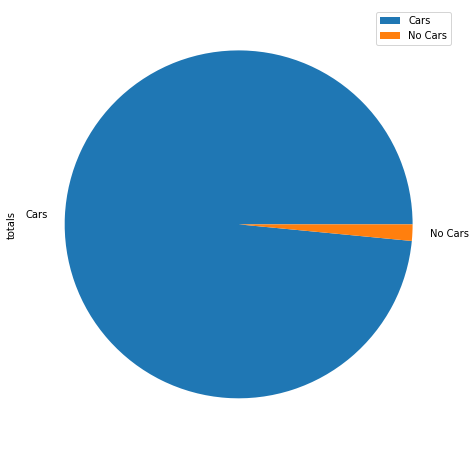

In [18]:
#Creating new df for pie chart and plotting
cars_df = pd.DataFrame({"totals": [cars,no_cars],},
                 index =['Cars','No Cars'])

plot = cars_df.plot.pie(y='totals', figsize=(8,8)) 


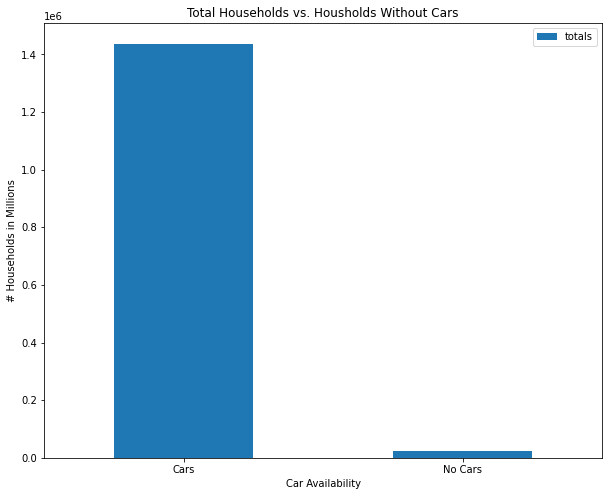

In [19]:
#Create bar chart of car data
cars_bar = cars_df[["totals"]]
cars_bar.plot(kind = "bar", figsize=(10,8), rot = 0)
plt.ylabel("# Households in Millions")
plt.xlabel("Car Availability")
plt.title("Total Households vs. Housholds Without Cars")
plt.savefig("Bar_Cars.png")

In [20]:
urban_stores_cars = urban_stores.sort_values(by = "NoCar LowAccess1mile Share", ascending = False)
urban_stores_cars.head()

,NoCar LowAccess1mile Share,NoCar LowAccess1mile,LAhalfand10,lapop1share,Name,LILATracts_1And10,LowAccess_LowIncome1mile,LowAccess_LowIncome1milePRCT,Income_Level,LA1and20,...,LATracts20,lapophalf,Urban,lapop1,LA1and10,OHU2010,LILATracts_halfAnd10,LowAccess_LowIncome05milesPRCT,LATracts_half,YesCar
480,0.444030,257.093290,1,1.000000,48.00,1,674.611916,0.720739,Low Income,1,...,0,936.000016,1,936.000016,1,579,1,0.720739,1,321.906710
378,0.319001,586.005052,1,0.843264,87.00,1,2455.049295,0.561539,Low Income,1,...,0,4361.267284,1,3686.748546,1,1837,1,0.654164,1,1250.994948
462,0.287459,201.796212,1,1.000000,82.02,1,1183.345234,0.625116,Low Income,1,...,0,1892.999995,1,1892.999995,1,702,1,0.625116,1,500.203788
528,0.282034,194.885421,1,0.878508,83.02,1,1257.771919,0.628886,Low Income,1,...,0,1999.999971,1,1757.015122,1,691,1,0.708701,1,496.114579
382,0.274652,410.055231,1,0.481494,118.00,1,907.591459,0.341842,Low Income,1,...,0,2654.999928,1,1278.367188,1,1493,1,0.750033,1,1082.944769


In [21]:
#Creating df that shows data related to population data for low access
low_access_df = urban_stores[{"POP2010", "lapop1", "lapop1share"}]
low_access_df.columns = ["Low Acc. Pop Share", "Low Acc Pop", "Total Pop"]
low_access_df

,Low Acc. Pop Share,Low Acc Pop,Total Pop
0,5530,3105.415489,0.561558
1,7713,3251.804581,0.421600
2,4550,1900.698065,0.417736
3,5757,3217.267229,0.558844
4,3239,3238.999945,1.000000
...,...,...,...
705,7119,6260.021520,0.879340
706,8376,1913.503440,0.228451
707,7180,5667.255401,0.789311
708,12065,10627.521800,0.880856


In [22]:
#Creating variables that total the populations for Total Population and Population with low access
low_access = low_access_df["Low Acc Pop"].sum()
total_pop = low_access_df["Total Pop"].sum()

In [23]:
#Creating the bar chart df
la_table = pd.DataFrame({"Population Count": [low_access, total_pop],},
                         index= ["Low Acc Pop", "Total Pop"])
la_table

,Population Count
Low Acc Pop,1.493967e+06
Total Pop,2.359273e+02


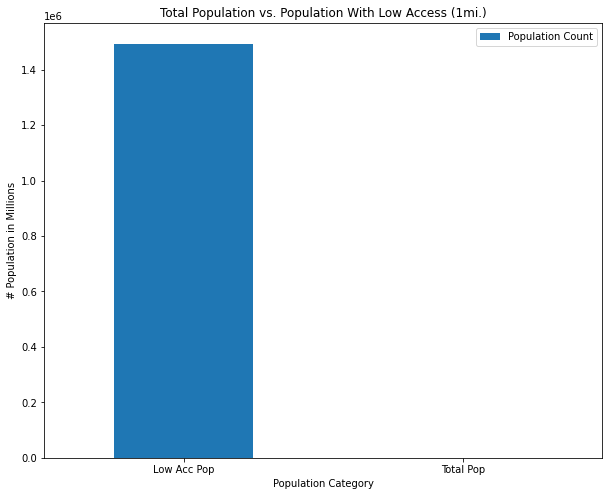

<Figure size 432x288 with 0 Axes>

In [25]:
#Creating the bar chart
pop_bar = la_table[["Population Count"]]
pop_bar.plot(kind = "bar", figsize=(10,8), rot=0)
plt.ylabel("# Population in Millions")
plt.xlabel("Population Category")
plt.title("Total Population vs. Population With Low Access (1mi.)")
plt.show()
plt.savefig("Bar_Population.png")